In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os

In [0]:
import albumentations

In [0]:
import dataloader

In [0]:
import Resnet

In [10]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Resnet.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [14]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Extracting ../data/cifar-10-python.tar.gz to ../data


In [0]:
import Train

In [16]:
from torch.optim.lr_scheduler import StepLR

model =  Resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

EPOCHS = 25
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    Train.train(model, device, train_loader, optimizer, epoch)
    Train.test(model, device, test_loader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


loss=1.0475246906280518 batch_id=390 Accuracy=53.04: 100%|██████████| 391/391 [03:10<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1731, Accuracy: 6051/10000 (61%)

EPOCH: 1


loss=0.5961645841598511 batch_id=390 Accuracy=73.70: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9253, Accuracy: 6877/10000 (69%)

EPOCH: 2


loss=0.4625473916530609 batch_id=390 Accuracy=82.01: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7008, Accuracy: 7665/10000 (77%)

EPOCH: 3


loss=0.3895324766635895 batch_id=390 Accuracy=87.39: 100%|██████████| 391/391 [03:10<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8661, Accuracy: 7390/10000 (74%)

EPOCH: 4


loss=0.3464607000350952 batch_id=390 Accuracy=91.50: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7304, Accuracy: 7821/10000 (78%)

EPOCH: 5


loss=0.29101693630218506 batch_id=390 Accuracy=94.39: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8261, Accuracy: 7802/10000 (78%)

EPOCH: 6


loss=0.07396328449249268 batch_id=390 Accuracy=96.44: 100%|██████████| 391/391 [03:11<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8689, Accuracy: 7891/10000 (79%)

EPOCH: 7


loss=0.0401284322142601 batch_id=390 Accuracy=97.54: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8881, Accuracy: 7884/10000 (79%)

EPOCH: 8


loss=0.1216144785284996 batch_id=390 Accuracy=98.44: 100%|██████████| 391/391 [03:10<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1896, Accuracy: 7608/10000 (76%)

EPOCH: 9


loss=0.0514032356441021 batch_id=390 Accuracy=98.44: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8521, Accuracy: 8065/10000 (81%)

EPOCH: 10


loss=0.011279183439910412 batch_id=390 Accuracy=99.12: 100%|██████████| 391/391 [03:15<00:00,  2.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9136, Accuracy: 8062/10000 (81%)

EPOCH: 11


loss=0.042371660470962524 batch_id=390 Accuracy=99.59: 100%|██████████| 391/391 [03:12<00:00,  2.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8650, Accuracy: 8167/10000 (82%)

EPOCH: 12


loss=0.006503772921860218 batch_id=390 Accuracy=99.83: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8145, Accuracy: 8319/10000 (83%)

EPOCH: 13


loss=0.0014882802497595549 batch_id=390 Accuracy=99.91: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8223, Accuracy: 8340/10000 (83%)

EPOCH: 14


loss=0.001484561013057828 batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7824, Accuracy: 8444/10000 (84%)

EPOCH: 15


loss=0.00017560720152687281 batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7821, Accuracy: 8458/10000 (85%)

EPOCH: 16


loss=0.0006049752118997276 batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:11<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7758, Accuracy: 8462/10000 (85%)

EPOCH: 17


loss=0.0001608133316040039 batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7838, Accuracy: 8466/10000 (85%)

EPOCH: 18


loss=0.00017300844774581492 batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7847, Accuracy: 8460/10000 (85%)

EPOCH: 19


loss=0.00029687880305573344 batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:10<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7864, Accuracy: 8471/10000 (85%)

EPOCH: 20


loss=0.0002701282501220703 batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:10<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7821, Accuracy: 8467/10000 (85%)

EPOCH: 21


loss=6.746053986717016e-05 batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7908, Accuracy: 8460/10000 (85%)

EPOCH: 22


loss=0.000271165365120396 batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:10<00:00,  2.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7911, Accuracy: 8449/10000 (84%)

EPOCH: 23


loss=0.0002628326474223286 batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7897, Accuracy: 8472/10000 (85%)

EPOCH: 24


loss=6.818771362304688e-05 batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:11<00:00,  2.04it/s]



Test set: Average loss: 0.7887, Accuracy: 8463/10000 (85%)



Text(0.5, 1.0, 'Test Accuracy')

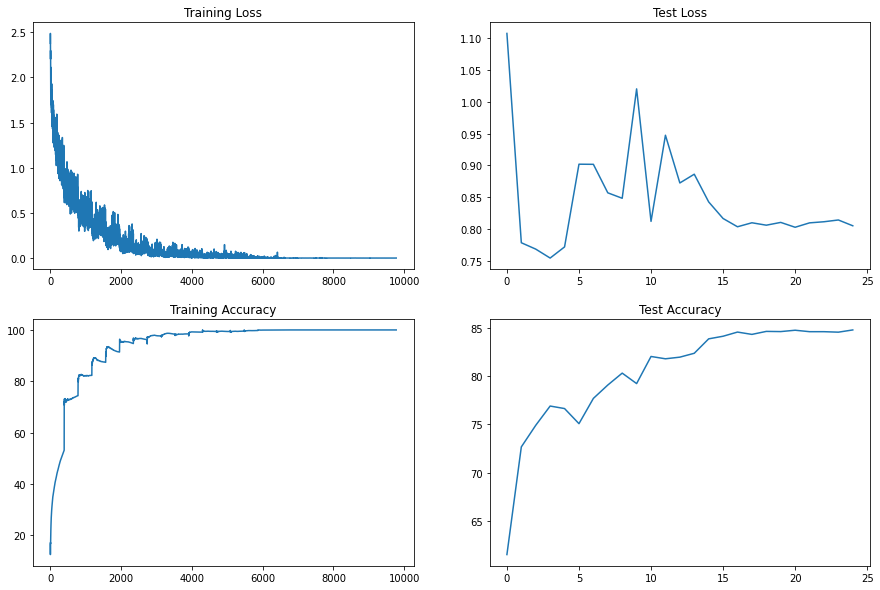

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")